In [1]:
import polars as pl
from pathlib import Path
import json
import os

In [2]:
print(os.getcwd())
base_path = "/Users/brunostordeur/Docs/GitHub/Memecoins/src/"

/Users/brunostordeur/Docs/GitHub/Memecoins/notebooks/exploration


In [11]:
memecoins_list_path = Path(f"{base_path}data/full_daily_data/memecoins_list.parquet")
memecoins_df = pl.read_parquet(memecoins_list_path)

memecoins_df.head()

id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,low_24h,price_change_24h,price_change_percentage_24h,market_cap_change_24h,market_cap_change_percentage_24h,circulating_supply,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated,fetch_rank,fetched_at
str,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,f64,f64,str,null,str,i64,"datetime[ns, UTC]"
"""dogecoin""","""doge""","""Dogecoin""","""https://coin-images.coingecko.…",0.216772,3.2361e10,8.0,3.2371e10,2.9036e9,0.236364,0.21669,-0.007559,-3.36975,-1.0613e9,-3.17543,1.4928e11,1.4932e11,null,0.731578,-70.35106,"""2021-05-08T05:08:23.458Z""",0.0000869,249492.4029,"""2015-05-06T00:00:00.000Z""",null,"""2025-05-19T08:46:15.828Z""",0,2025-05-19 08:50:53.022611 UTC
"""shiba-inu""","""shib""","""Shiba Inu""","""https://coin-images.coingecko.…",0.000014,8.2680e9,19.0,8.2715e9,3.23607361e8,0.000015,0.000014,-7.0188e-7,-4.76331,-4.1219e8,-4.74868,5.8925e14,5.8950e14,null,0.000086,-83.70062,"""2021-10-28T03:54:55.568Z""",5.6366e-11,2.4914e7,"""2020-11-28T11:26:25.838Z""",null,"""2025-05-19T08:46:09.691Z""",1,2025-05-19 08:50:53.022611 UTC
"""pepe""","""pepe""","""Pepe""","""https://coin-images.coingecko.…",0.0000128,5.3858e9,32.0,5.3858e9,2.5559e9,0.000014,0.000013,-3.9575e-7,-2.99837,-1.5412e8,-2.78203,4.2069e14,4.2069e14,4.2069e14,0.000028,-54.29902,"""2024-12-09T16:30:35.828Z""",5.5142e-8,23129.23227,"""2023-04-18T02:14:41.591Z""",null,"""2025-05-19T08:46:07.696Z""",2,2025-05-19 08:50:53.022611 UTC
"""official-trump""","""trump""","""Official Trump""","""https://coin-images.coingecko.…",12.56,2.5128e9,53.0,1.2564e10,1.0626e9,13.48,12.56,-0.549142,-4.18799,-1.0822e8,-4.12891,2.0000e8,1.0000e9,1.0000e9,73.43,-82.82779,"""2025-01-19T11:50:34.806Z""",4.29,193.88523,"""2025-01-18T03:40:29.231Z""",null,"""2025-05-19T08:46:15.731Z""",3,2025-05-19 08:50:53.022611 UTC
"""bonk""","""bonk""","""Bonk""","""https://coin-images.coingecko.…",0.000019,1.4670e9,74.0,1.6829e9,4.46561699e8,0.000021,0.0000188,-0.000001,-6.08983,-7.9753e7,-5.15623,7.7420e13,8.8816e13,8.8816e13,0.000058,-67.46468,"""2024-11-20T04:01:06.465Z""",8.6142e-8,21900.62254,"""2022-12-29T22:48:46.755Z""",null,"""2025-05-19T08:46:16.583Z""",4,2025-05-19 08:50:53.022611 UTC


In [6]:
import glob
import os
""" history_folder = Path(f"{base_path}daily_data_1000/history/")
parquet_files = glob.glob(os.path.join(history_folder, "**/*.parquet"), recursive=True)
num_parquet_files = len(parquet_files) """
history_folder = Path(f"{base_path}data/full_daily_data/history/")
parquet_files = glob.glob(os.path.join(history_folder, "**/*.parquet"), recursive=True)
num_parquet_files = len(parquet_files)
print(f"Number of Parquet files found: {num_parquet_files}")

Number of Parquet files found: 4627


In [7]:
import polars as pl
from pathlib import Path
from tqdm import tqdm
import os

files = [f for f in history_folder.glob("*.parquet") if os.path.getsize(f) > 5000]


relevant_files = []
for file in tqdm(files):
    try:
        df = pl.read_parquet(file)
        if df.height >= 3:
            relevant_files.append(file)
    except Exception:
        continue

print(f"Number of relevant files: {len(relevant_files)}")

100%|██████████| 4383/4383 [00:02<00:00, 1855.98it/s]

Number of relevant files: 4383


In [10]:
relevant_files

[PosixPath('/Users/brunostordeur/Docs/GitHub/Memecoins/src/data/full_daily_data/history/rna_daily.parquet'),
 PosixPath('/Users/brunostordeur/Docs/GitHub/Memecoins/src/data/full_daily_data/history/stupidcoin_daily.parquet'),
 PosixPath('/Users/brunostordeur/Docs/GitHub/Memecoins/src/data/full_daily_data/history/trog_daily.parquet'),
 PosixPath('/Users/brunostordeur/Docs/GitHub/Memecoins/src/data/full_daily_data/history/kitty-coin-solana_daily.parquet'),
 PosixPath('/Users/brunostordeur/Docs/GitHub/Memecoins/src/data/full_daily_data/history/chikun-litecoin-mascot_daily.parquet'),
 PosixPath('/Users/brunostordeur/Docs/GitHub/Memecoins/src/data/full_daily_data/history/liquor_daily.parquet'),
 PosixPath('/Users/brunostordeur/Docs/GitHub/Memecoins/src/data/full_daily_data/history/notcoin_daily.parquet'),
 PosixPath('/Users/brunostordeur/Docs/GitHub/Memecoins/src/data/full_daily_data/history/luna-by-virtuals_daily.parquet'),
 PosixPath('/Users/brunostordeur/Docs/GitHub/Memecoins/src/data/ful

In [8]:
results = []
for file in tqdm(relevant_files):
    symbol = file.stem
    try:
        df = pl.read_parquet(file)
        metrics = compute_metrics(df)  # or extract_features(df)
        if metrics:
            metrics["symbol"] = symbol
            results.append(metrics)
    except Exception:
        continue

metrics_df = pl.DataFrame(results)

100%|██████████| 4383/4383 [00:02<00:00, 1981.31it/s]


In [9]:
metrics_df

shape: (0, 0)
┌┐
╞╡
└┘

In [13]:
import polars as pl
from pathlib import Path
import numpy as np
from tqdm.notebook import tqdm


files = list(history_folder.glob("*.parquet"))

# --- Metric Computation ---
def compute_metrics(df: pl.DataFrame) -> dict:
    df = df.sort("timestamp")
    prices = df["price"].to_numpy()

    if len(prices) < 2 or prices[0] == 0:
        return None  # skip bad data

    # Total return
    ret = (prices[-1] - prices[0]) / prices[0]

    # Log returns
    log_returns = np.diff(np.log(prices))
    vol = np.std(log_returns)

    # Max drawdown
    running_max = np.maximum.accumulate(prices)
    drawdowns = (prices - running_max) / running_max
    max_dd = drawdowns.min()

    return {
        "return": ret,
        "volatility": vol,
        "max_drawdown": max_dd
    }

# --- Loop over all files ---
results = []

for file in tqdm(relevant_files):
    symbol = file.stem  # unique memecoin identifier
    print(symbol)
    try:
        df = pl.read_parquet(file)
        metrics = compute_metrics(df)
        if metrics:
            metrics["symbol"] = symbol
            results.append(metrics)
    except Exception:
        continue



  0%|          | 0/4383 [00:00<?, ?it/s]

rna_daily
stupidcoin_daily
trog_daily
kitty-coin-solana_daily
chikun-litecoin-mascot_daily
liquor_daily
notcoin_daily
luna-by-virtuals_daily
capybara-nation_daily
pssymonstr_daily
zoa-ai_daily
generational-wealth-3_daily
onigchi_daily
crypto-bro_daily
metaverse-filipino-worker_daily
maga-hat_daily
the-last-play_daily
vitalek-buteren_daily
smudge-cat-solana_daily
donald-tremp_daily
shibapoconk_daily
mochi-3_daily
coq-ai_daily
starknet-brother_daily
catjak_daily
ribble_daily
silly-dragon_daily
mmm_daily
just-cuz_daily
meta-monopoly_daily
culture-of-solana-token_daily
decentralization-obligatory-practicality-essential_daily
skull-of-pepe-token_daily
kai_daily
puppers_daily
meng-chong_daily
dyor-token-2_daily
dinolfg_daily
son-of-brett_daily
upx_daily
pundu_daily
tiny-panda_daily
gigacat-2_daily
chibi_daily
doge-ceo_daily
barbiecrashbandicootrfk88_daily
chad-coin_daily
pepe-black_daily
niccagewaluigielmo42069inu_daily
babypepefi_daily
trump-derangement-syndrome_daily
culo_daily
sui-dog_dai

In [14]:
# --- Create Polars DataFrame ---
metrics_df = pl.DataFrame(results)
metrics_df = metrics_df.sort("return", descending=True)

metrics_df.head(10)

return,volatility,max_drawdown,symbol
f64,f64,f64,str
455.450659,0.516456,-0.946262,"""maga-trump_daily"""
437.136468,0.483946,-0.682101,"""tronkey_daily"""
292.460615,0.135769,-0.417797,"""would_daily"""
218.69278,0.674408,-0.977971,"""tron-bull_daily"""
124.899324,0.233902,-0.943154,"""neiro-3_daily"""
112.58818,0.1274,-0.809752,"""spx6900_daily"""
84.100916,0.353272,-0.959115,"""catcoin_daily"""
81.903425,0.256355,-0.978812,"""department-of-government-effic…"
80.510838,0.352059,-0.696769,"""titcoin-2_daily"""


In [ ]:
top_10_threshold = metrics_df.select(pl.col("return").quantile(0.9, interpolation="nearest")).item()
bottom_10_threshold = metrics_df.select(pl.col("return").quantile(0.1, interpolation="nearest")).item()

metrics_df = metrics_df.with_columns([
    (pl.col("return") >= top_10_threshold).cast(pl.Int8).alias("top_10_performer"),
    (pl.col("return") <= bottom_10_threshold).cast(pl.Int8).alias("bottom_10_performer")
])

#metrics_df.sort("return", descending=True).head(10)
metrics_df.sort("return", descending=False).head(10)

return,volatility,max_drawdown,symbol,top_10_performer,bottom_10_performer
f64,f64,f64,str,i8,i8
-1.0,1.530298,-1.0,"""lambo-0fcbf0f7-1a8f-470d-ba09-…",0,1
-1.0,1.155894,-1.0,"""blove-dapp-token_daily""",0,1
-1.0,1.012833,-1.0,"""baby-neiro_daily""",0,1
-1.0,0.374586,-1.0,"""fat-guy_daily""",0,1
-0.999991,0.482484,-0.999999,"""henlo-2_daily""",0,1
-0.999925,0.342034,-0.999926,"""moo-moo_daily""",0,1
-0.999893,0.151503,-0.999917,"""blockchainpeople_daily""",0,1
-0.99975,0.193353,-0.999862,"""lil-bub-on-sol_daily""",0,1
-0.999673,0.259406,-0.999852,"""faml_daily""",0,1


In [51]:
list(metrics_df.filter(pl.col("top_performer")==1).select("symbol"))


[shape: (39,)
 Series: 'symbol' [str]
 [
 	"tronkey"
 	"tron-bull"
 	"neiro-3"
 	"catcoin"
 	"spx6900"
 	…
 	"zygo-the-frog"
 	"book-of-ethereum"
 	"kolin-2"
 	"agenda-47"
 	"aintivirus"
 ]]

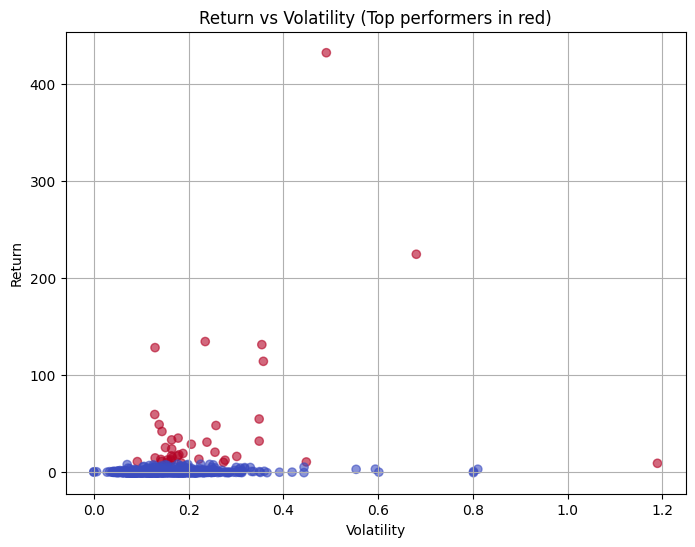

In [35]:
import matplotlib.pyplot as plt

# Convert to numpy for plotting
returns = metrics_df["return"].to_numpy()
vols = metrics_df["volatility"].to_numpy()
labels = metrics_df["top_performer"].to_numpy()

plt.figure(figsize=(8,6))
plt.scatter(vols, returns, c=labels, cmap="coolwarm", alpha=0.6)
plt.xlabel("Volatility")
plt.ylabel("Return")
plt.title("Return vs Volatility (Top performers in red)")
plt.grid(True)
plt.show()


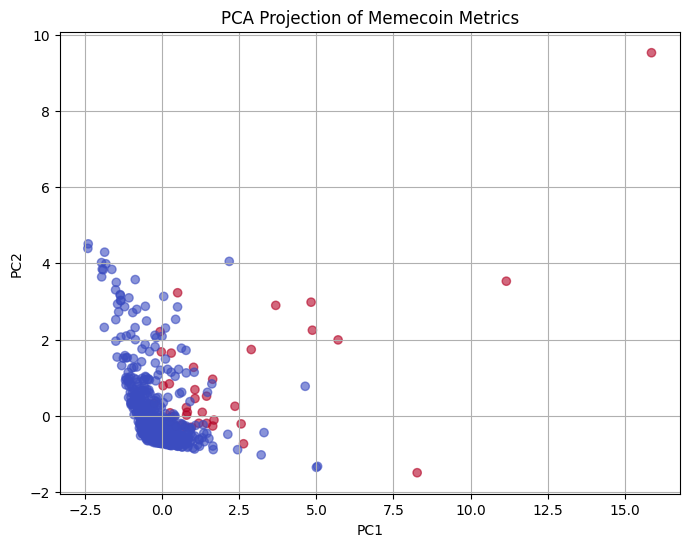

In [36]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select features
X = metrics_df.select(["return", "volatility", "max_drawdown"]).to_numpy()
X_scaled = StandardScaler().fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap="coolwarm", alpha=0.6)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Projection of Memecoin Metrics")
plt.grid(True)
plt.show()


In [40]:
metrics_df= metrics_df.with_columns(pl.col("symbol").str.replace("_daily", ""))
metrics_df 

return,volatility,max_drawdown,symbol,top_performer
f64,f64,f64,str,i8
432.206541,0.49075,-0.682101,"""tronkey""",1
224.348782,0.680684,-0.977971,"""tron-bull""",1
134.293821,0.235138,-0.943154,"""neiro-3""",1
131.133691,0.354616,-0.959115,"""catcoin""",1
128.032649,0.129177,-0.809752,"""spx6900""",1
…,…,…,…,…
-0.988007,0.121369,-0.99219,"""baby-bnb""",0
-0.988711,0.166882,-0.9949,"""litecoin-mascot""",0
-0.989165,0.178799,-0.9955,"""jeo-boden""",0


In [42]:
def extract_early_features(df: pl.DataFrame, days: int = 3) -> dict:
    df = df.sort("timestamp").head(days)

    if df.height < days:
        return None

    prices = df["price"].to_numpy()
    market_caps = df["market_cap"].to_numpy()
    volumes = df["volume"].to_numpy()

    ret_3d = (prices[-1] - prices[0]) / prices[0]
    vol_3d = np.std(np.diff(np.log(prices)))
    cap_change = (market_caps[-1] - market_caps[0]) / market_caps[0]
    vol_avg = np.mean(volumes)
    pos_days = np.sum(np.diff(prices) > 0)

    return {
        "early_return": ret_3d,
        "early_volatility": vol_3d,
        "marketcap_growth": cap_change,
        "avg_volume": vol_avg,
        "positive_days": pos_days
    }


In [43]:
early_features = []

for file in tqdm(files):
    symbol = file.stem
    try:
        df = pl.read_parquet(file)
        features = extract_early_features(df, days=3)
        if features:
            features["symbol"] = symbol
            early_features.append(features)
    except:
        continue

early_df = pl.DataFrame(early_features)

# Example usage:


  0%|          | 0/761 [00:00<?, ?it/s]

/var/folders/fd/7nflbhgd79bc_g28mlzphckw0000gn/T/ipykernel_62030/4173671625.py:13: RuntimeWarning: invalid value encountered in scalar divide
  cap_change = (market_caps[-1] - market_caps[0]) / market_caps[0]
/var/folders/fd/7nflbhgd79bc_g28mlzphckw0000gn/T/ipykernel_62030/4173671625.py:13: RuntimeWarning: divide by zero encountered in scalar divide
  cap_change = (market_caps[-1] - market_caps[0]) / market_caps[0]


In [44]:
early_df

early_return,early_volatility,marketcap_growth,avg_volume,positive_days,symbol
f64,f64,f64,f64,i64,str
1.120802,0.375897,NaN,1.0247e7,1,"""trog_daily"""
-0.070234,0.036411,NaN,8.0483e8,0,"""notcoin_daily"""
1.926245,0.53686,inf,1.9313e6,1,"""luna-by-virtuals_daily"""
-0.1394,0.075063,NaN,3.6067e7,0,"""maga-hat_daily"""
-0.257212,0.148672,NaN,2.9304e6,0,"""the-last-play_daily"""
…,…,…,…,…,…
-0.278366,0.168913,inf,986626.674025,1,"""nobody-sausage_daily"""
-0.128383,0.068702,NaN,161699.485093,0,"""gluteus-maximus-by-virtuals_da…"
0.151724,0.015372,NaN,28727.344958,2,"""toad-killer_daily"""


In [43]:
train_df = early_df.join(metrics_df.select(["symbol", "top_performer"]), on="symbol", how="inner")

# Optional: sort by label to inspect
train_df = train_df.sort("top_performer", descending=True)
train_df.head()

In [54]:
with open(Path(f"{base_path}daily_data_1000/snapshots/dogecoin_snapshot.json"), 'r') as f:
    example_snapshot = json.load(f)

In [55]:
example_snapshot

{'id': 'dogecoin',
 'symbol': 'doge',
 'name': 'Dogecoin',
 'web_slug': 'dogecoin',
 'asset_platform_id': None,
 'platforms': {'': ''},
 'detail_platforms': {'': {'decimal_place': None, 'contract_address': ''}},
 'block_time_in_minutes': 1,
 'hashing_algorithm': 'Scrypt',
 'categories': ['Smart Contract Platform',
  'Meme',
  'Dog-Themed',
  'Elon Musk-Inspired',
  'Proof of Work (PoW)',
  'GMCI Meme Index',
  'GMCI 30 Index',
  'GMCI Index',
  'Coinbase 50 Index',
  '4chan-Themed'],
 'preview_listing': False,
 'public_notice': None,
 'additional_notices': [],
 'localization': {'en': 'Dogecoin',
  'de': 'Dogecoin',
  'es': 'Dogecoin',
  'fr': 'Dogecoin',
  'it': 'Dogecoin',
  'pl': 'Dogecoin',
  'ro': 'Dogecoin',
  'hu': 'Dogecoin',
  'nl': 'Dogecoin',
  'pt': 'Dogecoin',
  'sv': '',
  'vi': 'Dogecoin',
  'tr': 'Dogecoin',
  'ru': 'Dogecoin',
  'ja': 'ドージコイン',
  'zh': '狗币',
  'zh-tw': '狗狗幣',
  'ko': '도지코인',
  'ar': 'الدوجكوين',
  'th': 'Dogecoin',
  'id': 'Dogecoin',
  'cs': '',
  'da'